In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.ndimage import distance_transform_edt as dst
import sys
sys.path.insert(0,r'../src')
from Vsi import Vsi, rock_type
import os
import tifffile

In [2]:
os.chdir(r'../')
#-----load data------------------------------
# im = np.load('gross_512.npy')
# im1 = np.load('Berea Sandstone.npy')
im = tifffile.imread('data/mtgambier.tif')
im1 = tifffile.imread('data/castlegate.tif')
#-------invert data (void=1, solid=0)--------

# im=im+1
# im[im==2]=0

# im1=im1+1
# im1[im1==2]=0

Text(0.5, 1.0, 'Berea SS')

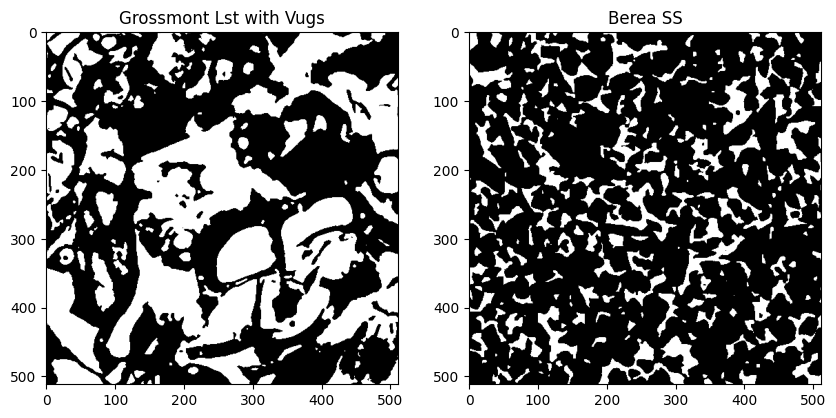

In [3]:
fg,ax = plt.subplots(1,2, figsize=(10,7))
ax[0].imshow(im[300], 'gray')
ax[0].set_title('Grossmont Lst with Vugs')
ax[1].imshow(im1[0], 'gray')
ax[1].set_title('Berea SS')

### Scale-independent Variance

In [4]:
# distance map of a slice. 
ds=dst(im) 
mn_r1 = ds.max() # maximum width of pores is used as minimum radius for moving windows
#mn_r1 = get_r(mn_r1)
mx_r1 = mn_r1+100 

ds=dst(im1)
mn_r2 = ds.max()
#mn_r2 = get_r(mn_r2)
mx_r2 = mn_r2+100

In [5]:
mn_r1=50
mx_r1=mn_r1+60

mn_r2=13
mx_r2=mn_r2+60

In [6]:
'Grosmont Lst radius = ' + '{0:.0f}'.format(mn_r1)+ ' voxels'

'Grosmont Lst radius = 50 voxels'

In [7]:
'Berea Ss radius = ' + '{0:.0f}'.format(mn_r2)+ ' voxels'

'Berea Ss radius = 13 voxels'

In [8]:
vf = Vsi(im, no_radii=20,
         no_samples_per_radius=500,
         min_radius=mn_r1, max_radius=mx_r1)
#----same on Berea SS-----------
vf1 = Vsi(im1, no_radii=20,
          no_samples_per_radius=500,
          min_radius=mn_r2, max_radius=mx_r2)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.31it/s]


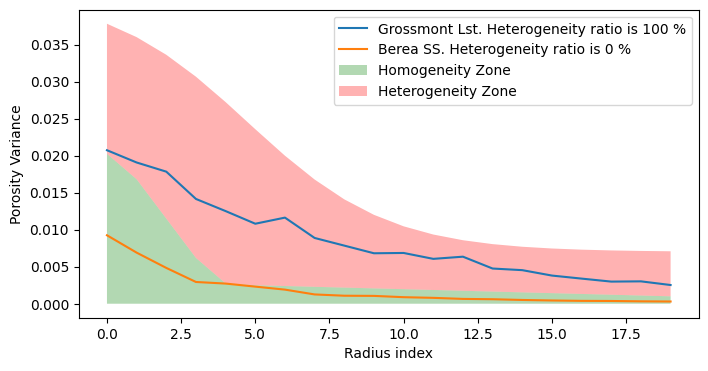

In [9]:
plt.figure(figsize=(8,4))
vf.plot(label='Grossmont Lst. '+rock_type(vf.variance),fill=0)
vf1.plot(label='Berea SS. '+rock_type(vf1.variance), x_label='Radius index')